# 13_DL from scratch - 예제 1

# 숫자 맞추기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [3]:
# softmax의 정의
def Softmax(x):
    x = np.subtract(x, np.max(x))       # prevent overflow
                    # 기준이 되는 값
                        # 뺄셈할 값

    ex = np.exp(x)

    return ex / np.sum(ex)

In [4]:
X = np.zeros((5,5,5))

X[:, :, 0] = [ [0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X[:, :, 1] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1] ]
X[:, :, 2] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X[:, :, 3] = [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0] ]
X[:, :, 4] = [ [1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]

In [5]:
# 원핫 인코딩, 정답지
D = np.array([
    [[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]
])

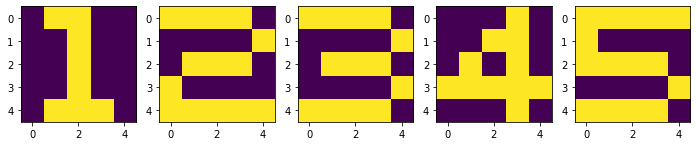

In [6]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])

plt.show()

In [8]:
def ReLU(x):
    return np.maximum(0, x)

In [9]:
# Relu를 이용한 정방향 계산
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
                        # x :  입력 데이터를 통해
                    # W1 : weight를 통과
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [ ]:
# 역전파
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3